In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/zachpinto/Desktop/dev/fast_food_nutrition_tracker/data/processed/cleaned_df_02.csv")

In [3]:
df.head()

,company,item,calories,calories_from_fat,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbs,fiber,sugar,protein,weight_watcher_points
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0


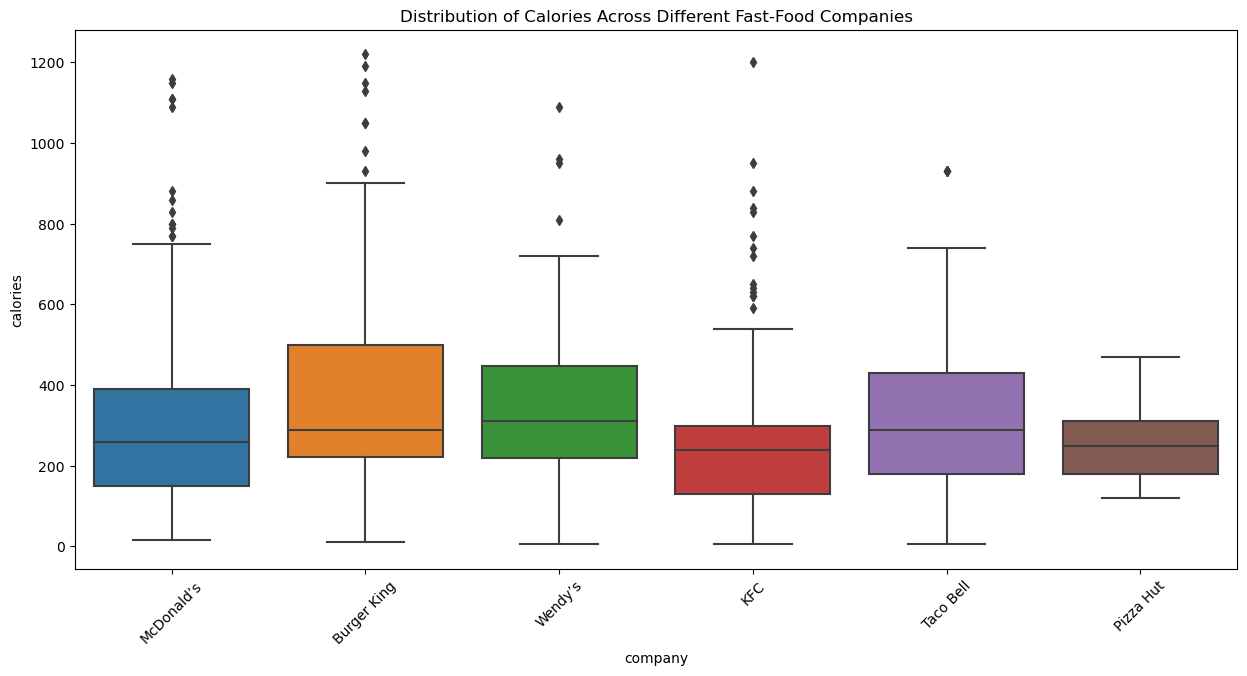

In [4]:
# Plotting the distribution of calories across different fast-food companies
plt.figure(figsize=(15, 7))
sns.boxplot(x='company', y='calories', data=df)
plt.title("Distribution of Calories Across Different Fast-Food Companies")
plt.xticks(rotation=45)
plt.show()

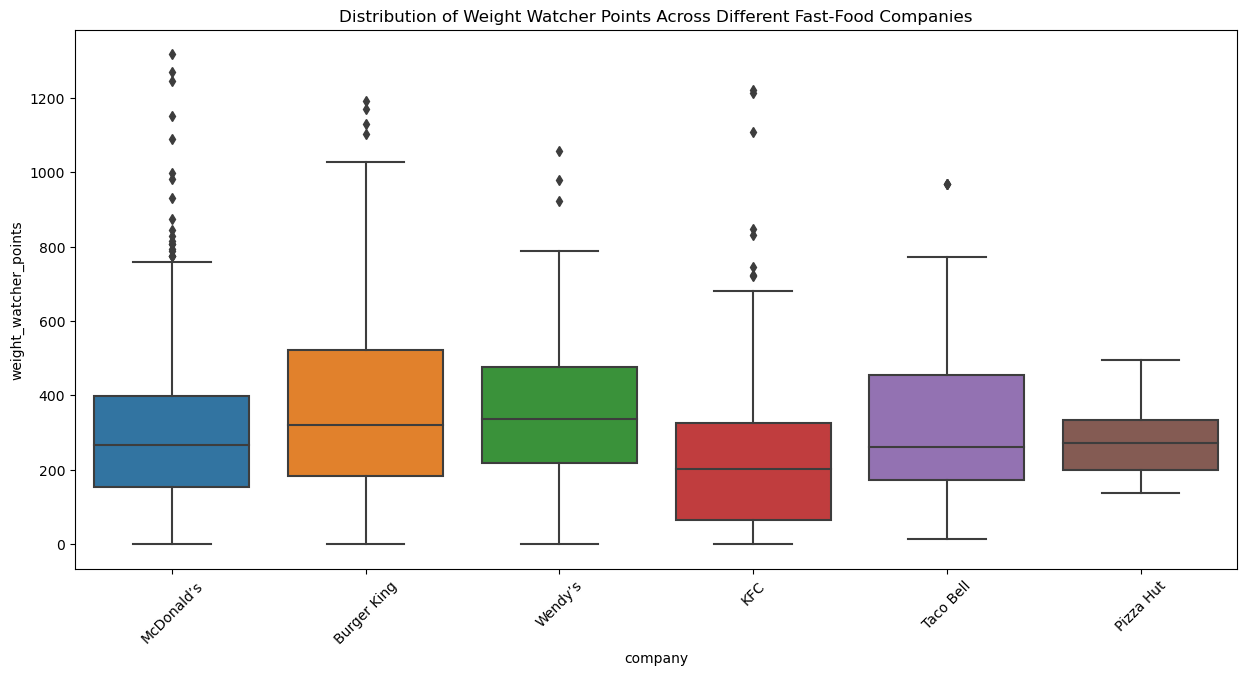

In [5]:
# Plotting the distribution of Weight Watcher points across different fast-food companies
plt.figure(figsize=(15, 7))
sns.boxplot(x='company', y='weight_watcher_points', data=df)
plt.title("Distribution of Weight Watcher Points Across Different Fast-Food Companies")
plt.xticks(rotation=45)
plt.show()

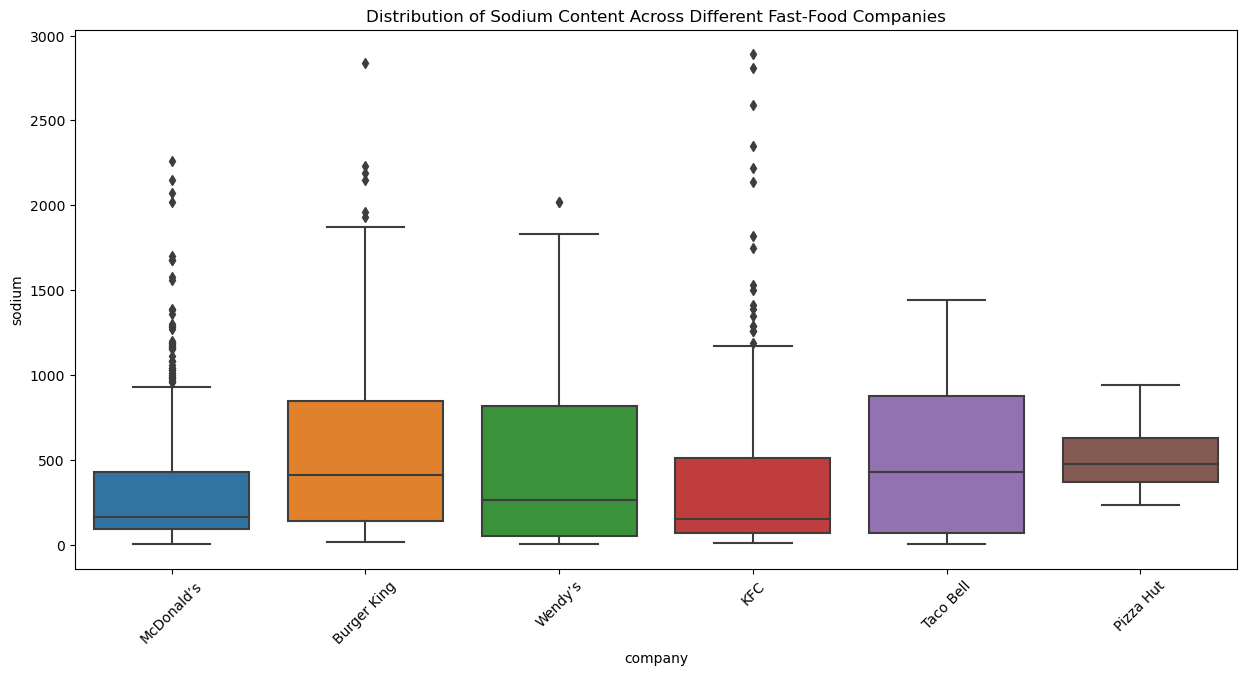

In [7]:
# Plotting the distribution of sodium across different fast-food companies
plt.figure(figsize=(15, 7))
sns.boxplot(x='company', y='sodium', data=df)
plt.title("Distribution of Sodium Content Across Different Fast-Food Companies")
plt.xticks(rotation=45)
plt.show()

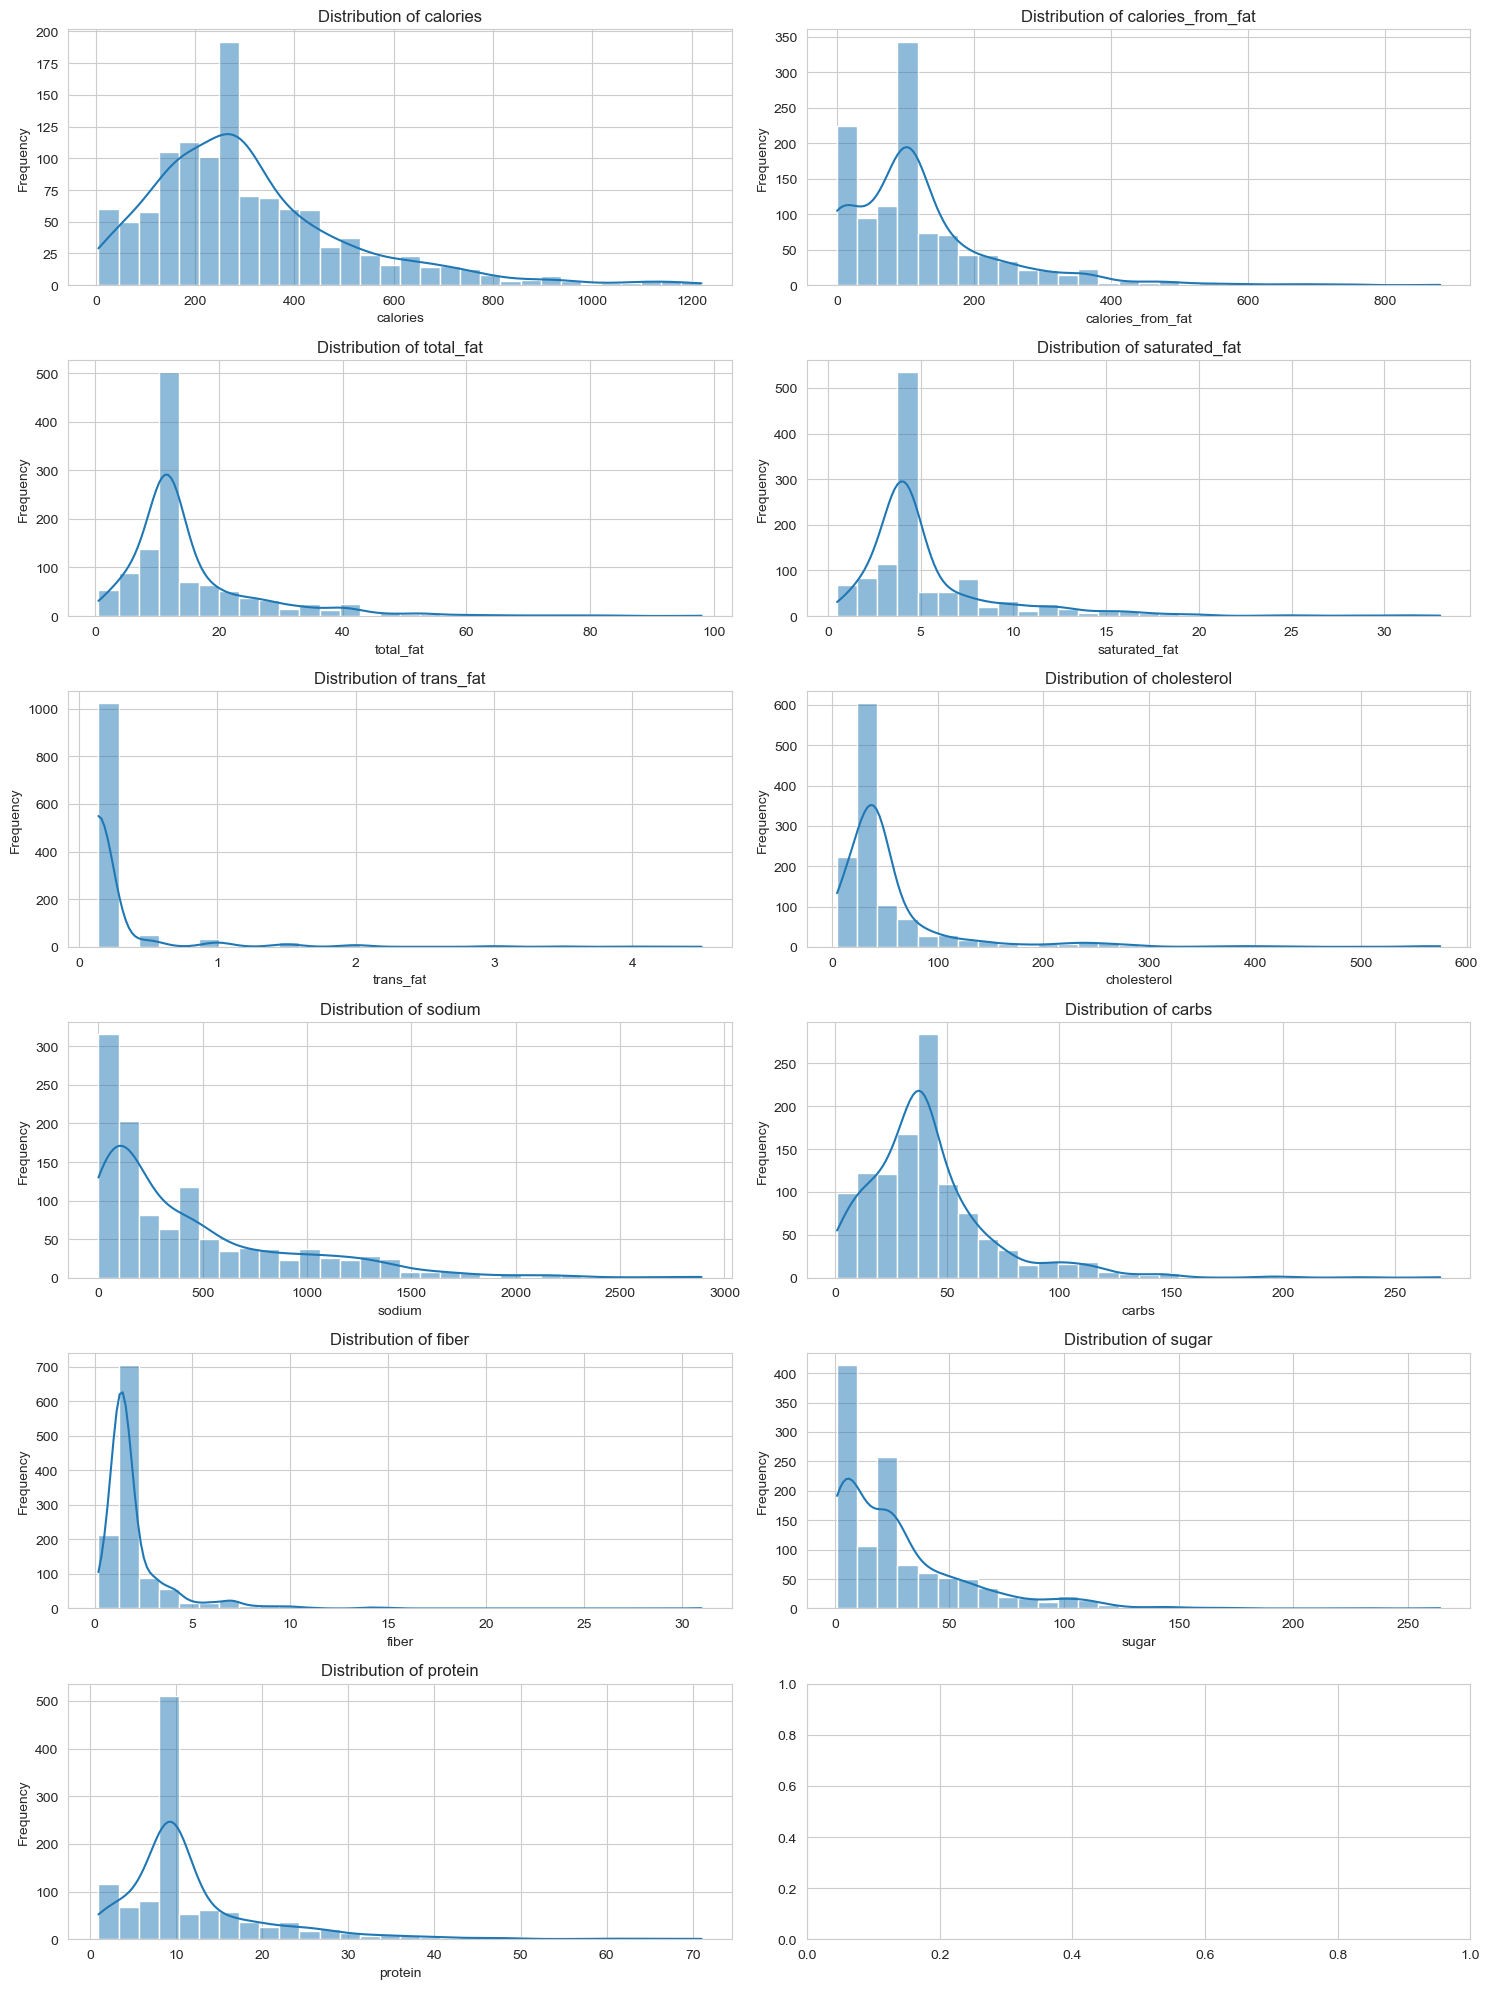

In [8]:
# Set style
sns.set_style("whitegrid")

# List of numeric columns for nutritional values
nutrients = [
    'calories', 'calories_from_fat', 'total_fat', 
    'saturated_fat', 'trans_fat', 'cholesterol', 
    'sodium', 'carbs', 'fiber', 'sugar', 'protein'
]

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Loop through each nutrient and plot its distribution
for i, nutrient in enumerate(nutrients):
    sns.histplot(df[nutrient], ax=axes[i//2, i%2], kde=True, bins=30)
    axes[i//2, i%2].set_title(f'Distribution of {nutrient}')
    axes[i//2, i%2].set_xlabel(nutrient)
    axes[i//2, i%2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

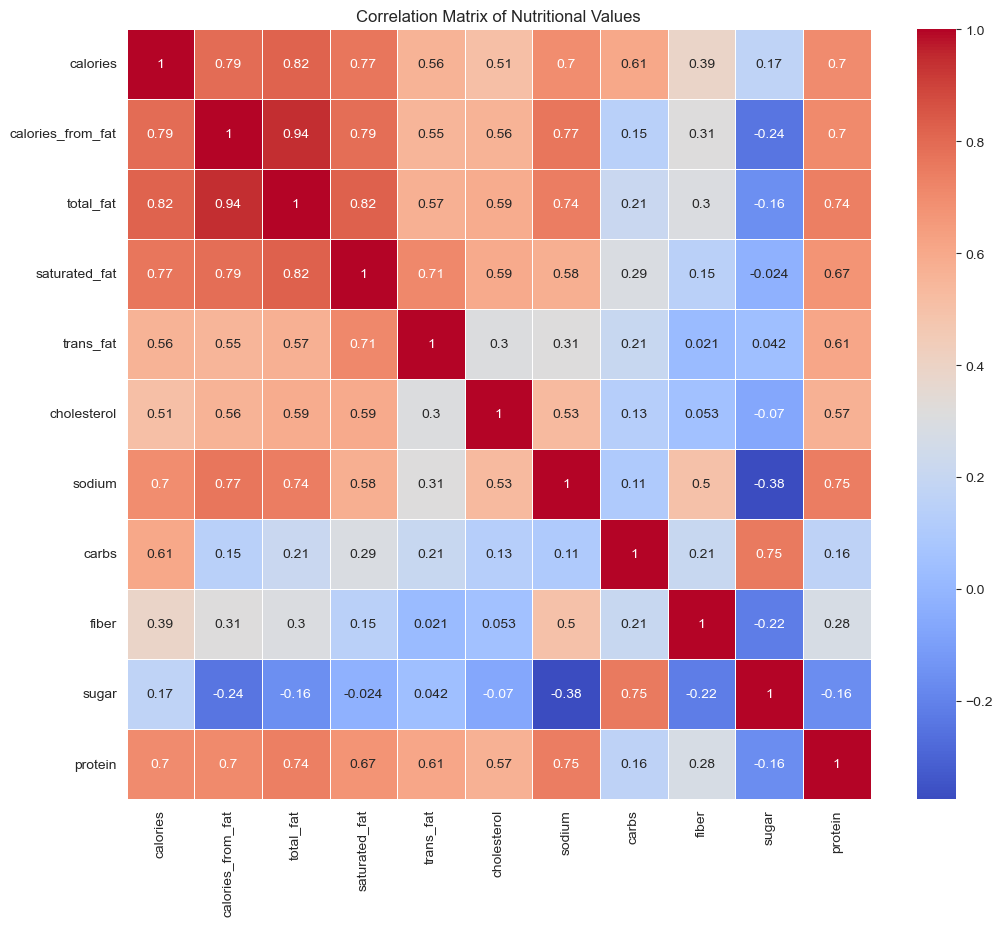

In [9]:
# Compute the correlation matrix
corr_matrix = df[nutrients].corr()

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix of Nutritional Values')
plt.show()

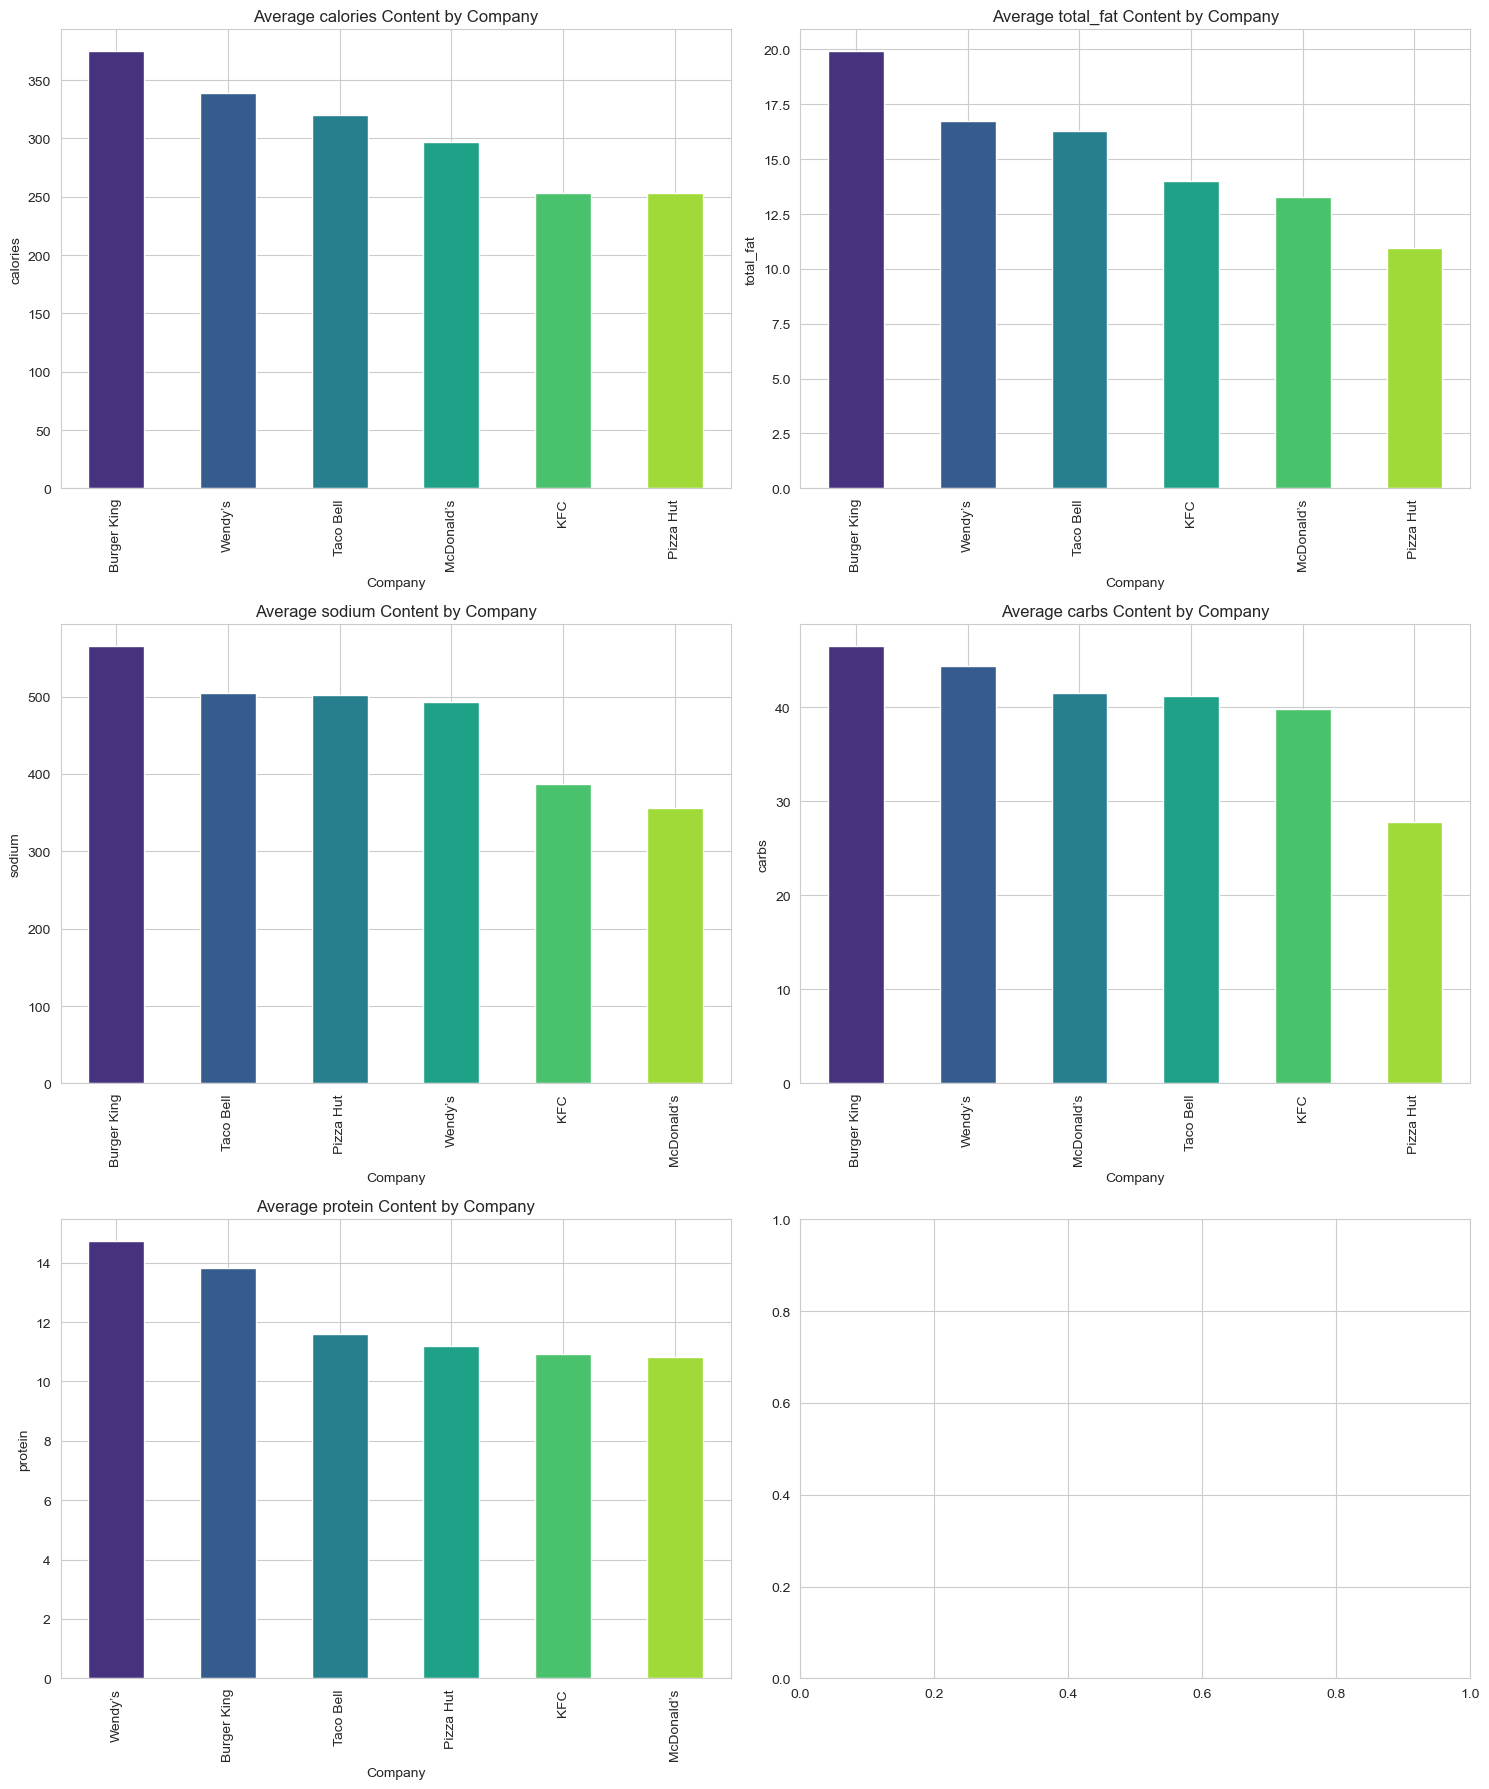

In [10]:
# Compute average nutrient content by company
avg_nutrient_by_company = df.groupby('company')[nutrients].mean()

# Plot for a few key nutrients
key_nutrients = ['calories', 'total_fat', 'sodium', 'carbs', 'protein']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

for i, nutrient in enumerate(key_nutrients):
    avg_nutrient_by_company[nutrient].sort_values(ascending=False).plot(kind='bar', ax=axes[i//2, i%2], color=sns.color_palette("viridis", len(avg_nutrient_by_company)))
    axes[i//2, i%2].set_title(f'Average {nutrient} Content by Company')
    axes[i//2, i%2].set_ylabel(nutrient)
    axes[i//2, i%2].set_xlabel('Company')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Calculate the protein to calorie ratio and add it as a new column
df['protein_to_calorie_ratio'] = df['protein'] / df['calories']

# Identify top 10 items with the highest protein to calorie ratio
top_protein_to_calorie = df.sort_values(by='protein_to_calorie_ratio', ascending=False).head(10)

top_protein_to_calorie[['company', 'item', 'protein', 'calories', 'protein_to_calorie_ratio']]

,company,item,protein,calories,protein_to_calorie_ratio
797,KFC,Diet Mountain Dew® (16 fl oz),9.434662,5.0,1.886932
771,KFC,Lemon Juice Packet,9.434662,5.0,1.886932
871,KFC,Tropicana® Light Lemonade (12 fl oz),9.434662,5.0,1.886932
615,Wendy’s,"Minute Maid Light Lemonade, Small",9.434662,5.0,1.886932
864,KFC,Sobe Lifewater Yumberry Pomegranate (30 fl oz),9.434662,5.0,1.886932
818,KFC,Lipton® Brisk® No Calorie Peach Iced Green Tea...,9.434662,5.0,1.886932
583,Wendy’s,"Brewed Unsweetened Iced Tea, Large",9.434662,5.0,1.886932
795,KFC,Diet Mist Twst® (30 fl oz),9.434662,5.0,1.886932
1028,Taco Bell,Mtn Dew® Baja Blast Zero Sugar (16 fl oz),9.434662,5.0,1.886932
1022,Taco Bell,Diet Mtn Dew® (16 fl oz),9.434662,5.0,1.886932
